# Our first machine learning model: Logistic Regression

In [105]:
# Import our libraries 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [106]:
# Load the titanic data set into a pandas dataframe.

df = pd.read_csv('data/titanic.csv')

## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [107]:
# Identify which columns have null values. 

df.isnull().any()

passengerid    False
survived       False
pclass         False
name           False
sex            False
age             True
sibsp          False
parch          False
ticket         False
fare           False
cabin           True
embarked        True
dtype: bool

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [108]:
# Check to see if our data has any duplicate rows.

df.duplicated().any()

False

# Use sns.pariplot to visualize.
* Set the hue='survived'.

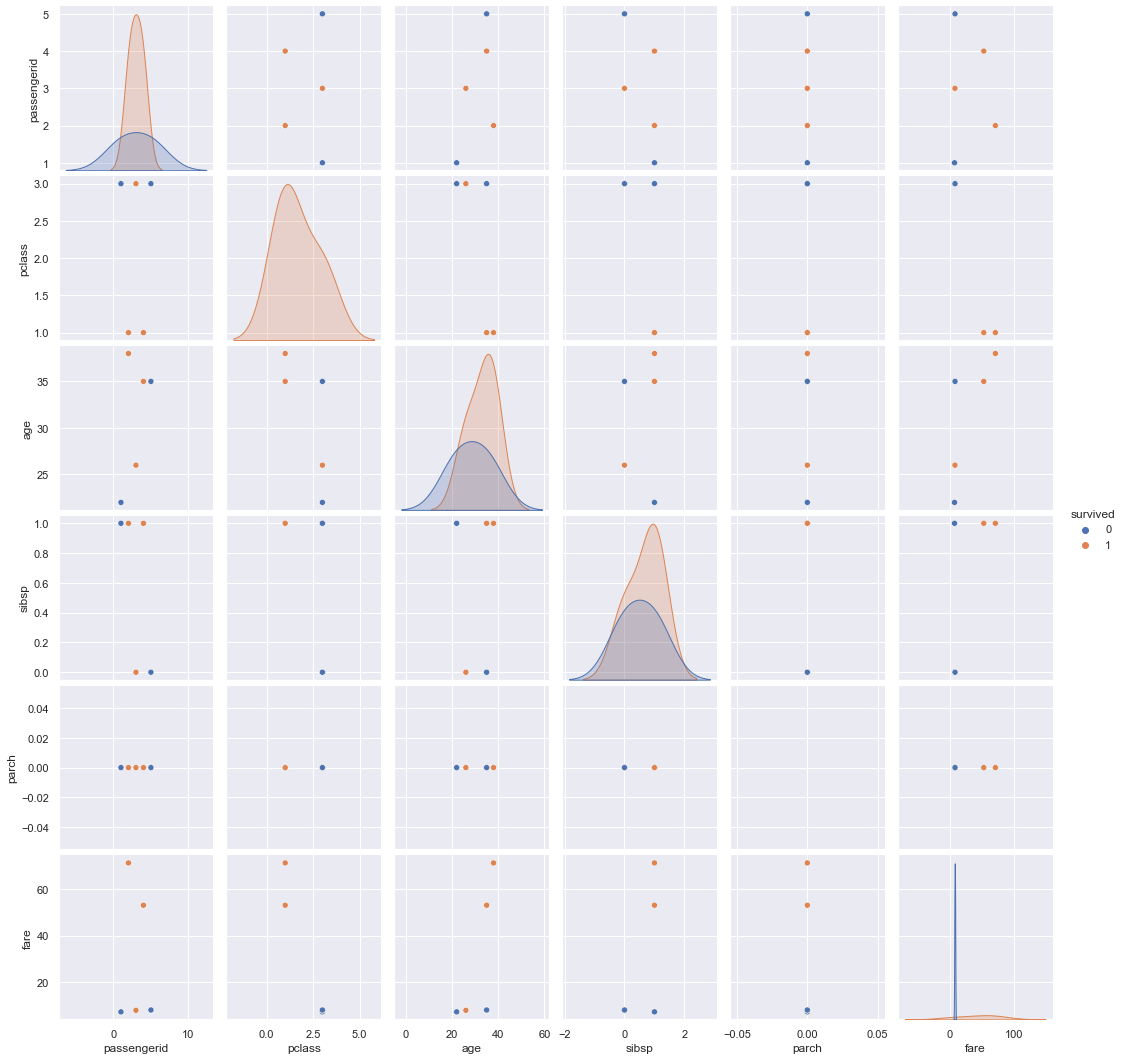

In [109]:
# Use sns.pariplot to visualize.


sns.pairplot(df.head(), hue = 'survived')

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [110]:
# Convert the sex column into a continuous variable by using pd.get_dummies

newdf = pd.get_dummies(df,columns = ['sex'], drop_first=True)

# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [111]:
# Select our features
selected_features = newdf[['fare','sex_male']]

# Set X to be the features we are going to use.
X = selected_features

# Set y to be our target variable. 
y = df['survived']

# Split our data into the testing and training groups. 

In [112]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [113]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=45)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(668, 2) (223, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [114]:
# Initalize our model
clf = LogisticRegression(random_state=45)

# Train our model using our training data.
clf.fit(X_train, y_train)


LogisticRegression(random_state=45)

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [115]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = clf.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       145
           1       0.72      0.76      0.74        78

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [118]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.811659
Precision Score: 0.719512
Recall Score: 0.756410
F1 Score 0.737500


In [119]:
confusion_matrix = confusion_matrix(y_test,y_pred)

Text(0, 0.5, 'Actual')

<Figure size 576x576 with 0 Axes>

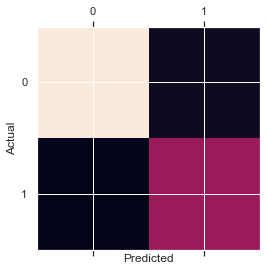

In [120]:
# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,8))
plt.matshow(confusion_matrix)
plt.xlabel('Predicted')
plt.ylabel('Actual')




In [121]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [122]:
# How many True Positives and True Negatives did your model get?
print('True Negatives %s' %TN + 'and %s' %TP + ' True Positives')

True Negatives [ 59 122]and [122  59] True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

Accuracy Score: 0.811659
Precision Score: 0.719512
Recall Score: 0.756410
F1 Score 0.737500


<Figure size 576x576 with 0 Axes>

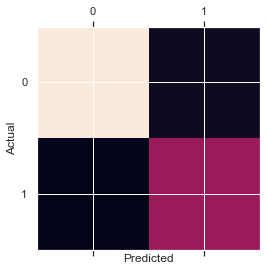

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
newdf = pd.get_dummies(df,columns = ['pclass','embarked','sex'], drop_first=True)


# Update your `selected_features` to include the new pclass and embarked features. 
selected_features = newdf[['fare','sex_male','pclass_2','pclass_3','embarked_Q','embarked_S','sibsp','parch']]

# Define your X and y variables
x = selected_features
y = df['survived']

# Split our data into testing and training.
# !!! Remember to use the same random state as you used before
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=45)


# Initalize our model_2
model_2 = LogisticRegression(random_state=45)

# Fit / Train our model using our training data.
model_2.fit(X_train, y_train)

# Make new predicitions using our testing data. 
y_pred = model_2.predict(X_test)

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_2 = recall_score(y_test, y_pred)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# Plot your confusion matrix.
confusion_matrix = confusion_matrix(y_test,y_pred)

fig = plt.figure(figsize=(8,8))
plt.matshow(confusion_matrix)
plt.xlabel('Predicted')
plt.ylabel('Actual');



# EXTRA CREDIT
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

Accuracy Score: 0.826816
Precision Score: 0.738462
Recall Score: 0.774194
F1 Score 0.755906


<Figure size 576x576 with 0 Axes>

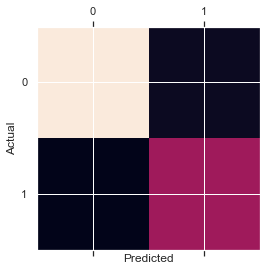

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df = pd.get_dummies(df,columns = ['pclass','embarked','sex'], drop_first=True)

# Fill null age values with mean age.
df.age.fillna(df.age.mean())

# Create new traveled_alone feature
df['traveled_alone'] = np.where(((df['sibsp'] == 0) | (df['parch'] == 0)), 1, 0)

# Update your `selected_features` to include the new traveled alone and age
selected_features = df[['fare','sex_male','pclass_2','pclass_3','embarked_Q','embarked_S','traveled_alone', 'age']]

# Define your X and y variables
x = selected_features
y = df['survived']

# Split our data into testing and training.
# Rememer to use the same random state as you used before
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression(random_state=45)

# Fit / Train our model using our training data.
model_3.fit(X_train, y_train)

# Make new predicitions using our testing data. 
y_pred = model_3.predict(X_test)

# Calculate our accuracy
accuracy_3 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_3 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_3 = recall_score(y_test, y_pred)

# Calculate your f1-score
f1_3 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
confusion_matrix_3 = confusion_matrix(y_test,y_pred)

fig = plt.figure(figsize=(8,8))
plt.matshow(confusion_matrix_3)
plt.xlabel('Predicted')
plt.ylabel('Actual');